In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#load FLAT_RCL_POST_2010.xlsx into dataframe df
df = pd.read_excel('data/FLAT_INV.xlsx')
#display first 5 rows of df
print(df.head())

  NHTSA_ACTION_NUMBER           MAKE    MODEL    YEAR           COMPNAME  \
0             AQ08001  PACE AMERICAN  TRAILER  2003.0             WHEELS   
1             AQ08001  PACE AMERICAN  TRAILER  2004.0             WHEELS   
2             AQ08001  PACE AMERICAN  TRAILER  2005.0             WHEELS   
3             AQ08001  PACE AMERICAN  TRAILER  2006.0             WHEELS   
4             AQ09001       APEXCONE  APX9004  9999.0  EXTERIOR LIGHTING   

              MFR_NAME       ODATE       CDATE     CAMPNO  \
0  PACE AMERICAN, INC.  20080618.0  20081029.0        NaN   
1  PACE AMERICAN, INC.  20080618.0  20081029.0        NaN   
2  PACE AMERICAN, INC.  20080618.0  20081029.0        NaN   
3  PACE AMERICAN, INC.  20080618.0  20081029.0        NaN   
4              CARFILO  20090326.0  20090706.0  05E069000   

                                SUBJECT  \
0          PACE AMERICAN 573 RETRACTION   
1          PACE AMERICAN 573 RETRACTION   
2          PACE AMERICAN 573 RETRACTION   
3   

In [4]:
# Count number of rows with ODATE empty
count_empty_odate = df['ODATE'].isnull().sum()
print(f"Number of rows with ODATE empty: {count_empty_odate}")

Number of rows with ODATE empty: 157


In [5]:
# Delete the rows with ODATE empty
df = df.dropna(subset=['ODATE'])
# Display the first 5 rows after dropping empty ODATE

In [6]:
# Extract year from the ODATE numeric column
df['year'] = df['ODATE'].astype(str).str[:4].astype(int)
df.head()

,NHTSA_ACTION_NUMBER,MAKE,MODEL,YEAR,COMPNAME,MFR_NAME,ODATE,CDATE,CAMPNO,SUBJECT,SUMMARY,year
0,AQ08001,PACE AMERICAN,TRAILER,2003.0,WHEELS,"PACE AMERICAN, INC.",20080618.0,20081029.0,NaN,PACE AMERICAN 573 RETRACTION,"BY LETTER DATED NOVEMBER 8, 2007, PACE AMERICA...",2008
1,AQ08001,PACE AMERICAN,TRAILER,2004.0,WHEELS,"PACE AMERICAN, INC.",20080618.0,20081029.0,NaN,PACE AMERICAN 573 RETRACTION,"BY LETTER DATED NOVEMBER 8, 2007, PACE AMERICA...",2008
2,AQ08001,PACE AMERICAN,TRAILER,2005.0,WHEELS,"PACE AMERICAN, INC.",20080618.0,20081029.0,NaN,PACE AMERICAN 573 RETRACTION,"BY LETTER DATED NOVEMBER 8, 2007, PACE AMERICA...",2008
3,AQ08001,PACE AMERICAN,TRAILER,2006.0,WHEELS,"PACE AMERICAN, INC.",20080618.0,20081029.0,NaN,PACE AMERICAN 573 RETRACTION,"BY LETTER DATED NOVEMBER 8, 2007, PACE AMERICA...",2008
4,AQ09001,APEXCONE,APX9004,9999.0,EXTERIOR LIGHTING,CARFILO,20090326.0,20090706.0,05E069000,HID REPLACEMENT KIT RECALL CAMPAIGNS,RMD IDENTIFIED SEVERAL HID REPLACEMENT LIGHTIN...,2009


In [7]:
# The COMPNAME column has major component name & minor component name separated by a colon. 
# Add a new column COMPNAME_MAJOR which will have the major component name.
def add_major_component_column(df):
    # Split the COMPNAME column by ':' and take the first part as the major component
    df['COMPNAME_MAJOR'] = df['COMPNAME'].str.split(':').str[0]
    return df
# Add the major component column to the dataframe
df = add_major_component_column(df)

In [10]:
# Save the modified dataframe to a new CSV file
df.to_csv('data/FLAT_INV_MODIFIED.csv', index=False)

ALL DATA IS CLEANED UPTO THIS POINT. LOAD STORED CLEAN DATA & ANALLYZE

In [2]:
# load data from data/cleaned_data_with_death_reported.csv
df = pd.read_csv('data/FLAT_INV_MODIFIED.csv')

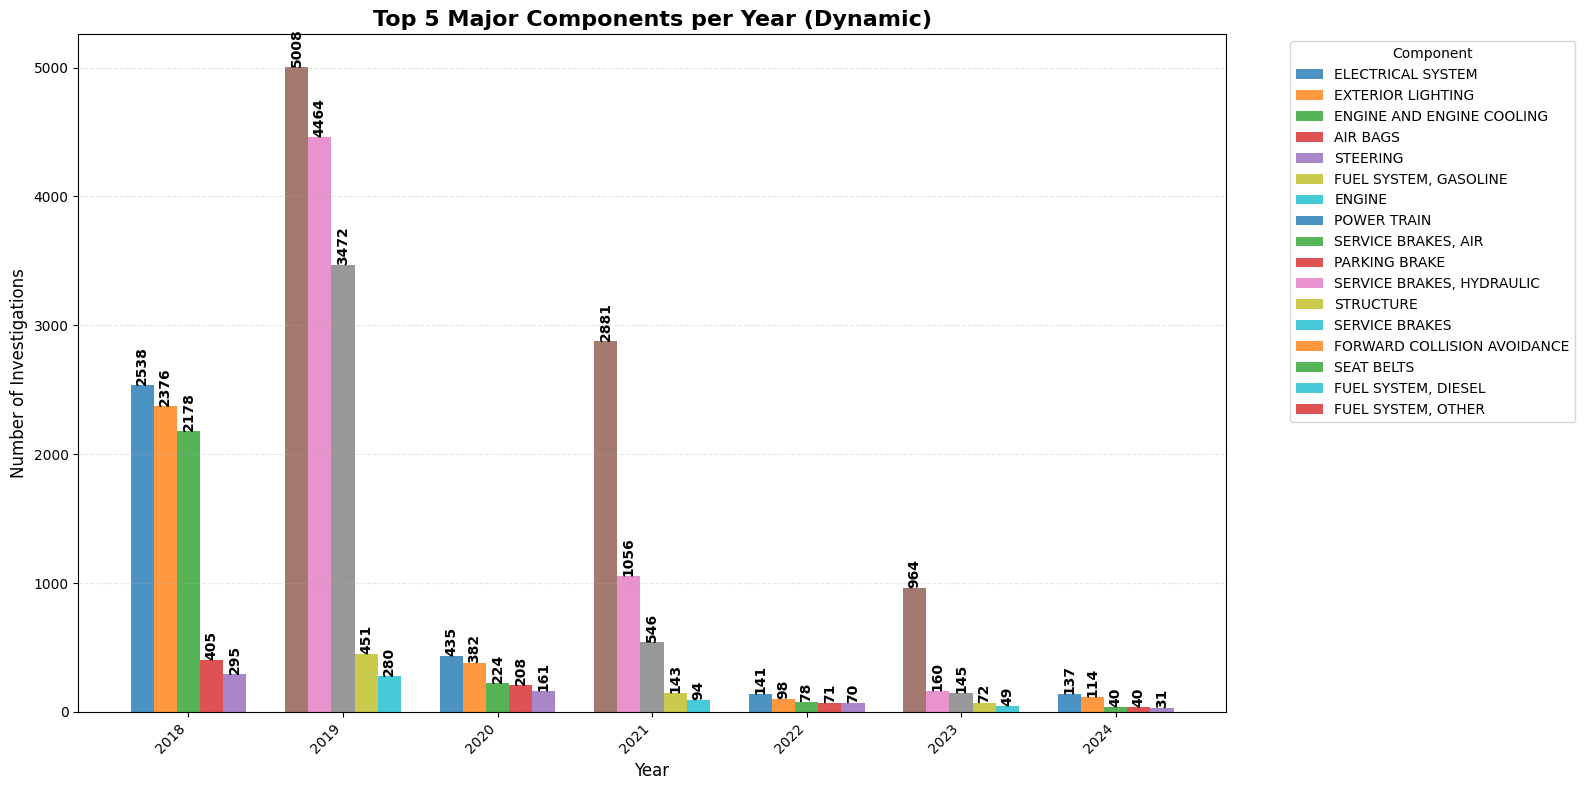


Top 5 components by year:
2018: ['ELECTRICAL SYSTEM - 2538', 'EXTERIOR LIGHTING - 2376', 'ENGINE AND ENGINE COOLING - 2178', 'AIR BAGS - 405', 'STEERING - 295']
2019: ['EXTERIOR LIGHTING - 5008', 'ENGINE AND ENGINE COOLING - 4464', 'ELECTRICAL SYSTEM - 3472', 'FUEL SYSTEM, GASOLINE - 451', 'ENGINE - 280']
2020: ['POWER TRAIN - 435', 'ELECTRICAL SYSTEM - 382', 'SERVICE BRAKES, AIR - 224', 'PARKING BRAKE - 208', 'STEERING - 161']
2021: ['AIR BAGS - 2881', 'SERVICE BRAKES, HYDRAULIC - 1056', 'ELECTRICAL SYSTEM - 546', 'STRUCTURE - 143', 'SERVICE BRAKES - 94']
2022: ['ENGINE - 141', 'FORWARD COLLISION AVOIDANCE - 98', 'SEAT BELTS - 78', 'POWER TRAIN - 71', 'ELECTRICAL SYSTEM - 70']
2023: ['ELECTRICAL SYSTEM - 964', 'SERVICE BRAKES, HYDRAULIC - 160', 'FUEL SYSTEM, GASOLINE - 145', 'POWER TRAIN - 72', 'FUEL SYSTEM, DIESEL - 49']
2024: ['ELECTRICAL SYSTEM - 137', 'FORWARD COLLISION AVOIDANCE - 114', 'FUEL SYSTEM, DIESEL - 40', 'FUEL SYSTEM, OTHER - 40', 'ENGINE - 31']


In [55]:


def plot_top_components_per_year_dynamic(df, from_year=None, to_year=None):
    # Filter by year range if specified
    data = df.copy()
    if from_year is not None:
        data = data[data['year'] >= from_year]
    if to_year is not None:
        data = data[data['year'] <= to_year]
    
    if data.empty:
        print("No data available for the specified year range.")
        return
    
    # Get top 5 components per year (this correctly gets different top 5 for each year)
    top_components = (
        data.groupby(['year', 'COMPNAME_MAJOR'])
        .size()
        .reset_index(name='count')
        .sort_values(['year', 'count'], ascending=[True, False])
    )
    top5_per_year = top_components.groupby('year').head(5)
    
    # Group by year for plotting
    years = sorted(top5_per_year['year'].unique())
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Set up positions
    year_positions = np.arange(len(years))
    bar_width = 0.15
    
    # Get all unique components that appear in ANY year's top 5
    all_components = sorted(top5_per_year['COMPNAME_MAJOR'].unique())
    #colors = plt.cm.Set3(np.linspace(0, 1, len(all_components)))
    #color_map = {comp: colors[i] for i, comp in enumerate(all_components)}
    
    # Keep track of which components we've added to legend
    legend_components = set()
    
    # Plot each year's data
    for year_idx, year in enumerate(years):
        # Get top 5 for THIS specific year (this changes per year)
        year_data = top5_per_year[top5_per_year['year'] == year].sort_values('count', ascending=False)
        
        # Position bars for this year
        n_bars = len(year_data)
        start_offset = -(n_bars - 1) * bar_width / 2
        
        for bar_idx, (_, row) in enumerate(year_data.iterrows()):
            x_pos = year_positions[year_idx] + start_offset + (bar_idx * bar_width)
            component_name = row['COMPNAME_MAJOR']
            
            # Add to legend only if we haven't seen this component before
            label = component_name if component_name not in legend_components else ""
            if component_name not in legend_components:
                legend_components.add(component_name)
            
            bar = ax.bar(x_pos, row['count'], bar_width, 
                        alpha=0.8, label=label)
            
            # Add data label
            ax.text(x_pos, row['count'], int(row['count']), 
                   ha='center', va='bottom', fontsize=10, rotation=90, fontweight='bold')
    
    # Create legend with all components that appeared
    ax.legend(title='Component', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    ax.set_title('Top 5 Major Components per Year (Dynamic)', fontsize=16, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Number of Investigations', fontsize=12)
    ax.set_xticks(year_positions)
    ax.set_xticklabels(years, rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary to verify dynamic behavior
    print("\nTop 5 components by year:")
    for year in years:
        year_top5 = top5_per_year[top5_per_year['year'] == year].sort_values('count', ascending=False)
        components_with_counts = [f"{comp} - {count}" for comp, count in zip(year_top5['COMPNAME_MAJOR'].values, year_top5['count'].values)]
        print(f"{year}: {components_with_counts}")


plot_top_components_per_year_dynamic(df, from_year=2018, to_year=2024)

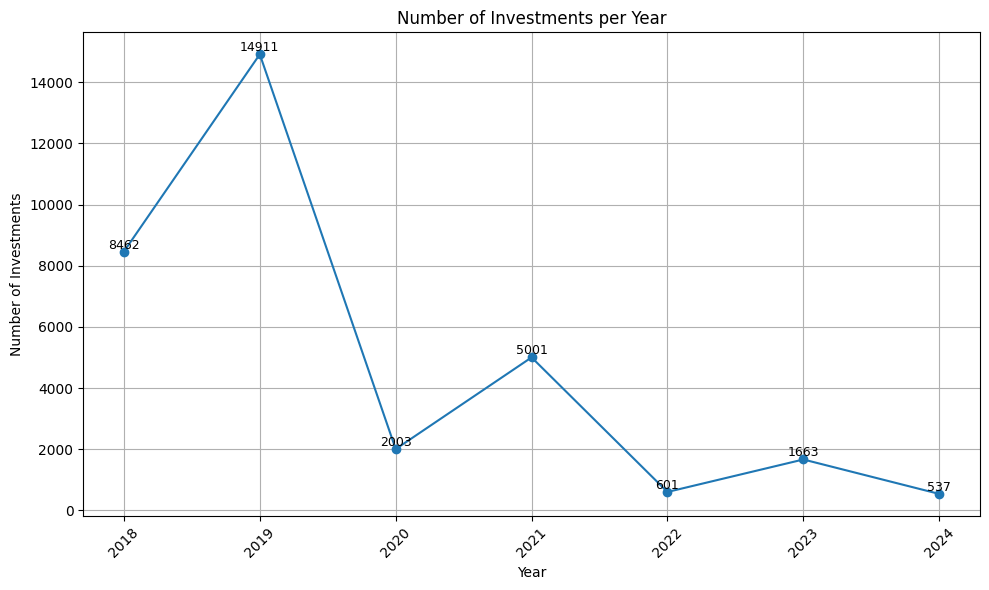

In [53]:
# Line graph of the number of investments per year with data labels
def plot_investments_per_year(df, from_year=None, to_year=None):
    # Filter by year range if specified
    data = df
    if from_year is not None:
        data = data[data['year'] >= from_year]
    if to_year is not None:
        data = data[data['year'] <= to_year]
    # Group by year and count the number of investments
    investments_per_year = data.groupby('year').size()
    
    # Plotting
    plt.figure(figsize=(10, 6))
    ax = investments_per_year.plot(kind='line', marker='o')
    plt.title('Number of Investments per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Investments')
    plt.grid(True)
    plt.xticks(investments_per_year.index, rotation=45)
    # Add data labels
    for x, y in zip(investments_per_year.index, investments_per_year.values):
        plt.text(x, y, str(int(y)), ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    plt.show()

# Example usage: plot from 2018 to 2024
plot_investments_per_year(df, from_year=2018, to_year=2024)

In [3]:
df.describe()

,YEAR,ODATE,CDATE,year
count,151690.000000,1.528910e+05,7.760300e+04,152891.000000
mean,2371.100218,2.012335e+07,2.010598e+07,2012.292627
std,1670.751374,8.305540e+04,1.114471e+05,8.314109
min,1965.000000,1.972031e+07,1.972053e+07,1972.000000
25%,2003.000000,2.012041e+07,2.005041e+07,2012.000000
50%,2005.000000,2.015022e+07,2.013071e+07,2015.000000
75%,2011.000000,2.015022e+07,2.021081e+07,2015.000000
max,9999.000000,2.025012e+07,2.025013e+07,2025.000000
